In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
import matplotlib.colors as colors
import cmocean.cm as cmo
from glob import glob
# import xgcm

In [2]:
from dask.distributed import Client
client = Client()
client

<Client: 'tcp://127.0.0.1:44309' processes=4 threads=4, memory=31.34 GiB>

In [3]:
import datetime
import nc_time_axis

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cartopy
import matplotlib.path as mpath

In [5]:
GRIDT_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-T_clim/*gridTclim.nc"
ICEMOD_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-icemod_clim/*icemodclim.nc"
NSQUARE_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-Nsquared/clim/*5d_Nsquared.nc"
EKE_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-EKE/clim/*EKEclim.nc"
MKE_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-MKE/clim/*MKE.nc"
SHEAR_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-shear/clim/*shear.nc"

In [6]:
GRIDT_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-T_clim/*gridTclim.nc"
ICEMOD_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-icemod_clim/*icemodclim.nc"
NSQUARE_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-Nsquared/clim/*5d_Nsquared.nc"
EKE_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-EKE/clim/*EKEclim.nc"
MKE_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-MKE/clim/*MKE.nc"
SHEAR_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-shear/clim/*shear.nc"

In [7]:
def prepro(ds):
    return ds.isel(y=slice(800, None))

In [8]:
grid_files = "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mesh_hgr.nc"
coords_file = "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/coordinates_CREG12_lbclnk_noz_vh20160930.nc"
mask_file= "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mask.nc"


In [9]:
grid = xr.open_mfdataset(grid_files, parallel=True, preprocess=prepro)
coords = xr.open_mfdataset(coords_file, parallel=True, preprocess=prepro)
mask = xr.open_mfdataset(mask_file, parallel=True, preprocess=prepro)

Load Transect data

In [10]:
data2plot_rho_t0 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/density_transect_0.nc')
data2plot_rho_t1 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/density_transect_1.nc')

In [11]:
data2plot_icethic_t0 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/sithic_transect_0.nc')
data2plot_icethic_t1 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/sithic_transect_1.nc')

In [12]:
ice_ref = data2plot_icethic_t0.sithic_ref_t0.mean('time_counter')
ice_fut = data2plot_icethic_t0.sithic_fut_t0.mean('time_counter')

In [13]:
PV_REF = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-PVORT/transect_1.nc')
PV_FUT = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-PVORT/transect_1.nc')

In [14]:
PV_REF_t2 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-PVORT/transect_2.nc')
PV_FUT_t2 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-PVORT/transect_2.nc')

In [15]:
data2plot_REF_PV = PV_REF.vototvor.differentiate('diag').drop('diag').interpolate_na("diag")
data2plot_FUT_PV = PV_FUT.vototvor.differentiate('diag').drop('diag').interpolate_na("diag")

/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/tmp/ipykernel_17872/3430947019.py:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  data2plot_REF_PV = PV_REF.vototvor.differentiate('diag').drop('diag').interpola

In [16]:
data2plot_REF_PV_t0  = data2plot_REF_PV
data2plot_FUT_PV_t0  = data2plot_FUT_PV

In [17]:
diag_transect_wp_bp_t0 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/Wp_Bp_transect_0.nc')
diag_transect_wp_bp_t1 = xr.open_dataset('/data0/project/drakkar/USERS/jrieck/transects/Wp_Bp_transect_1.nc')

In [18]:
data2plot_REF_wp_bp = diag_transect_wp_bp_t0.__xarray_dataarray_variable___ref_t0
data2plot_FUT_wp_bp = diag_transect_wp_bp_t0.__xarray_dataarray_variable___fut_t0

In [19]:
mean_WpBp_REF = xr.open_dataset("/data0/project/drakkar/USERS/jrieck/wp_bp_REF_clim.nc")
mean_WpBp_FUT = xr.open_dataset("/data0/project/drakkar/USERS/jrieck/wp_bp_FUT_clim.nc")

# $T_{BC} = −gw'ρ'$

In [20]:
from matplotlib.gridspec import GridSpec

In [21]:
from utils import *

In [22]:
g = 9.81

deptht = mean_WpBp_REF.sel(deptht=slice(0,200)).deptht
W2mW_conversion = 1e3

T_bc_REF = g * mean_WpBp_REF.sel(deptht=slice(0,200)).sum("deptht") * deptht.max() * W2mW_conversion
T_bc_FUT = g * mean_WpBp_FUT.sel(deptht=slice(0,200)).sum("deptht") * deptht.max() * W2mW_conversion

In [23]:
T_bc_REF = T_bc_REF.where(T_bc_REF!=0)
T_bc_FUT = T_bc_FUT.where(T_bc_FUT!=0)

In [24]:
def map_config(ax):
    ax.set_extent([-180, 180, 70, 90], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)

In [162]:
def latitude_labels(ax,ds):    
    labels = [int(item._x) for item in ax.get_xticklabels()]
    
    labels_coord = [np.round(ds.nav_lat.isel(diag=label).values) for label in labels ]
    
    for il in range(0,len(labels)):
        if labels[il] % 200:
            labels_coord[il]=''

    ax.set_xticklabels(labels_coord)

In [167]:
density_REF = data2plot_rho_t0.rhop_sig0_ref_t0.mean('time_counter')
density_FUT = data2plot_rho_t0.rhop_sig0_fut_t0.mean('time_counter')

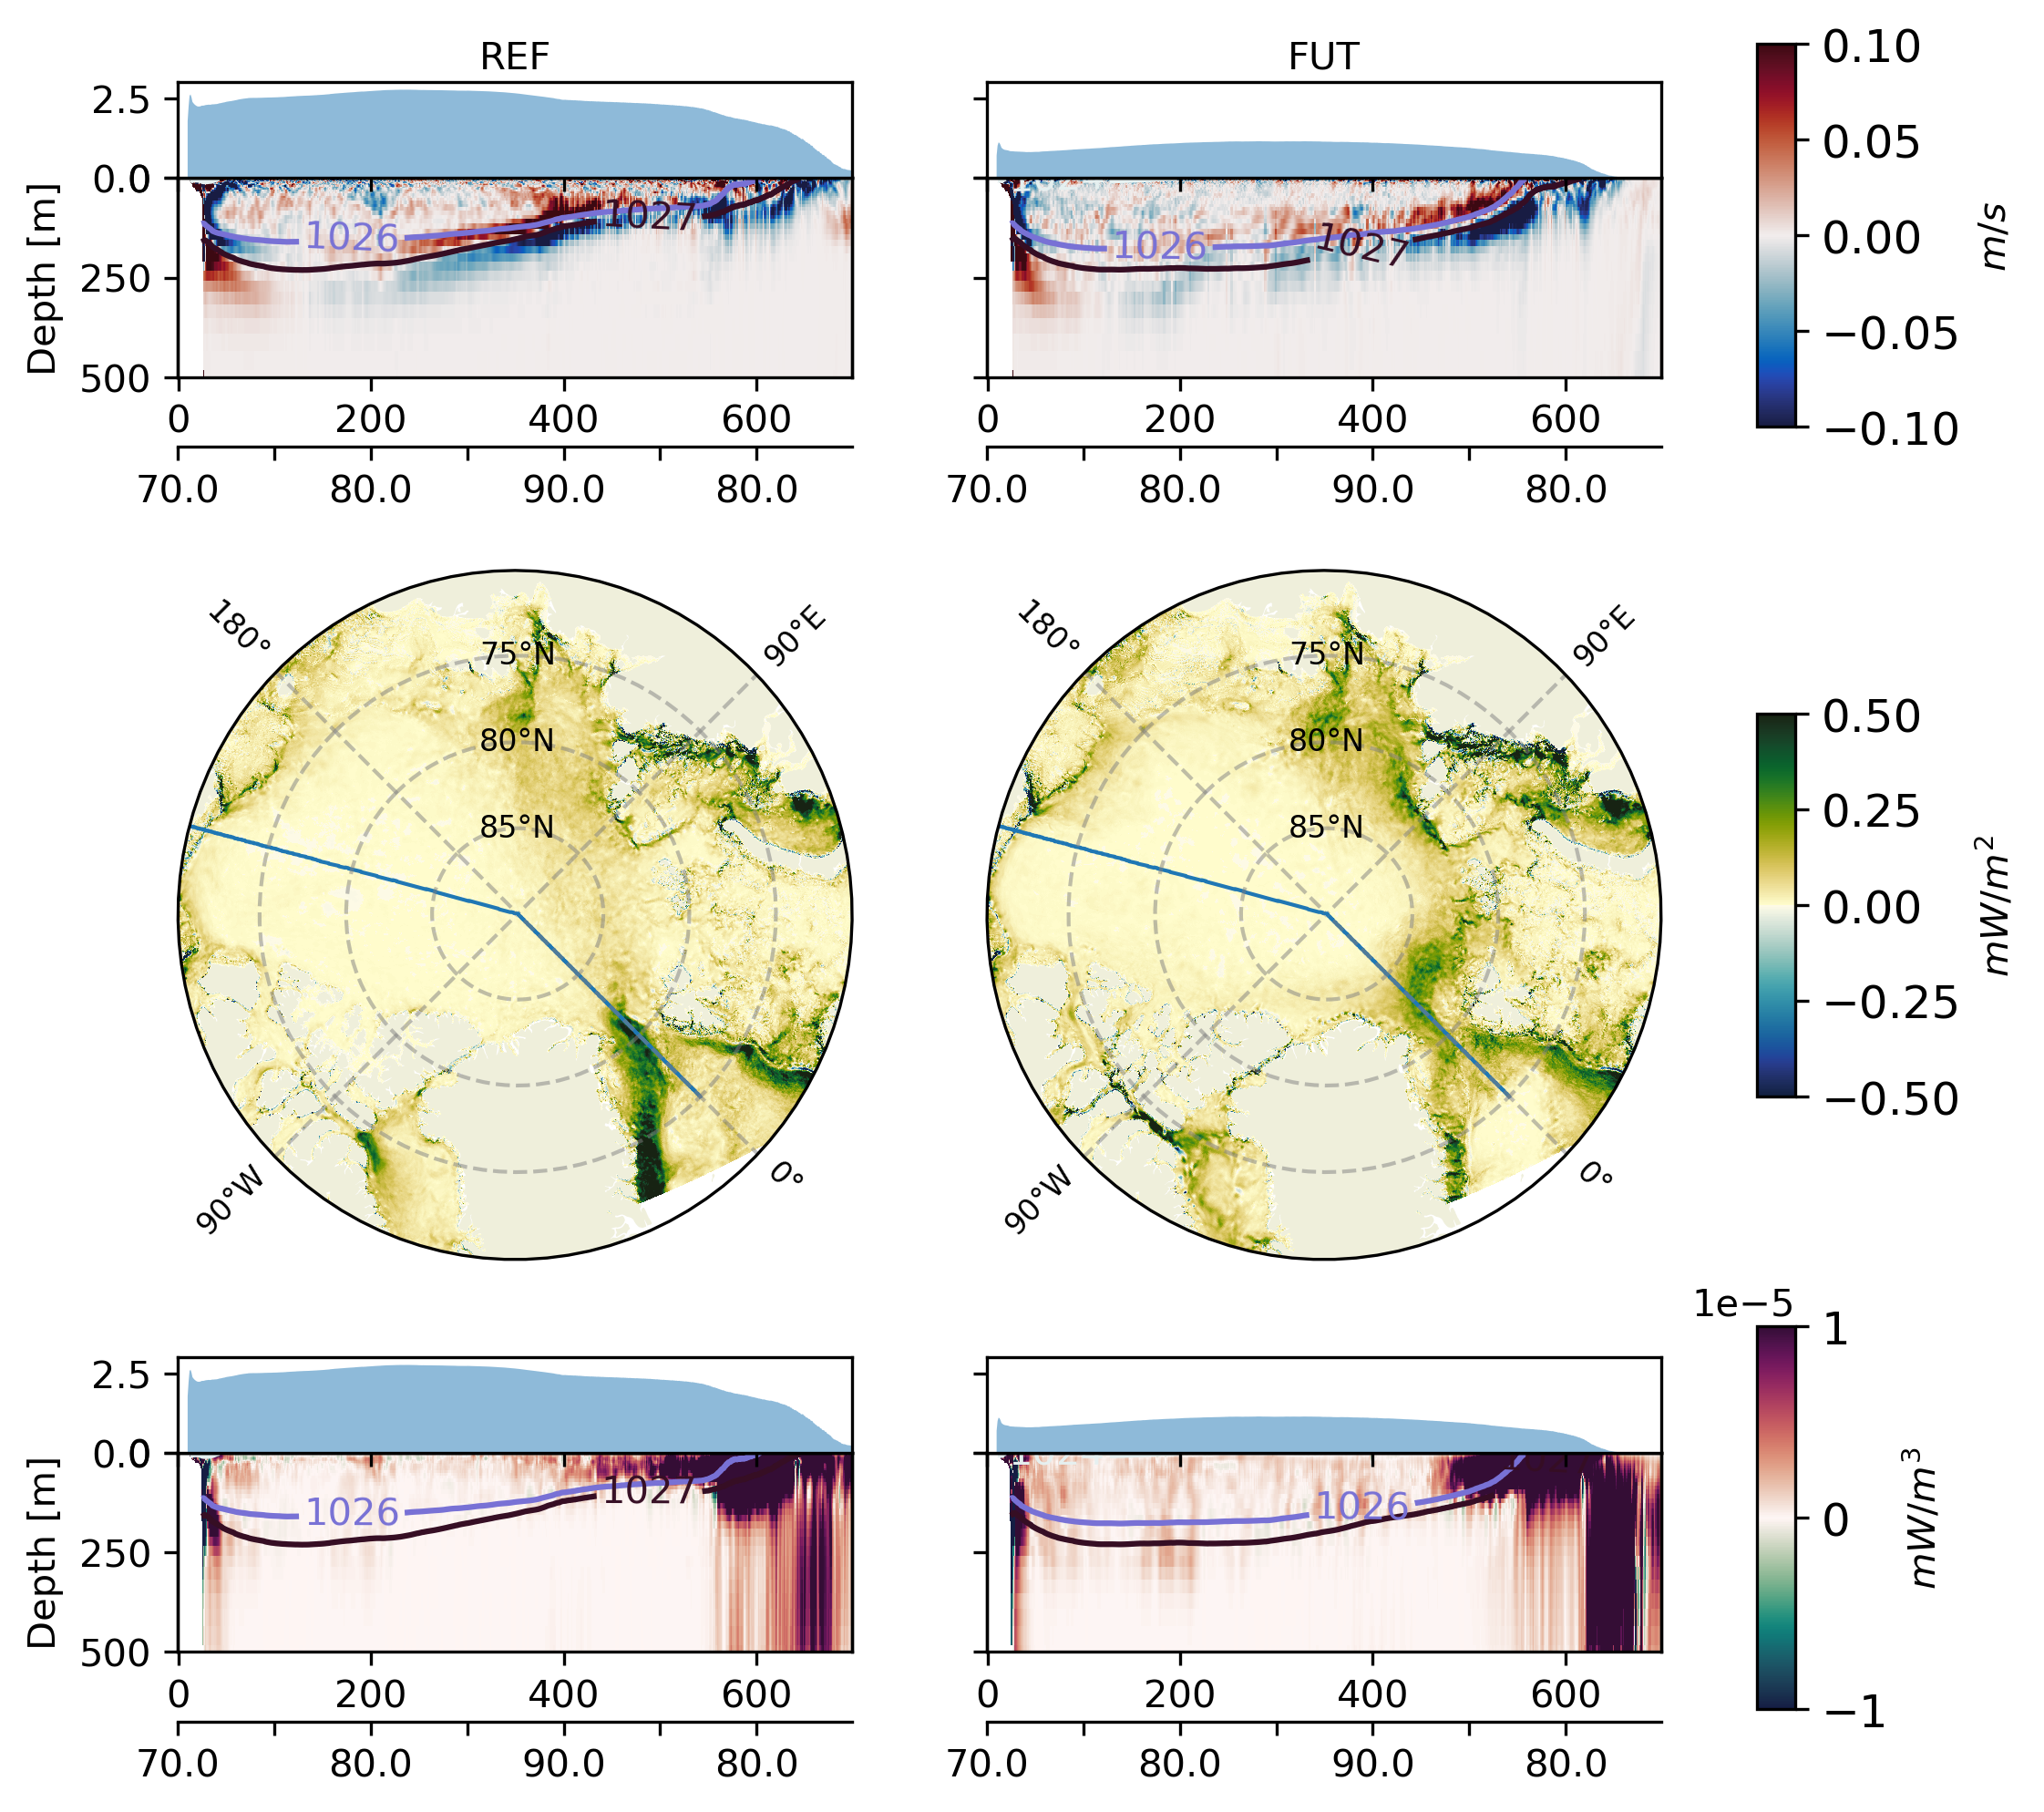

In [169]:
import matplotlib.ticker as mticker
fig = plt.figure(figsize=(7, 7),dpi=300)

gs = GridSpec(5, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
################################
ax3 = fig.add_subplot(gs[1:4, 0], projection = ccrs.NorthPolarStereo(-45))
ax4 = fig.add_subplot(gs[1:4, 1], projection = ccrs.NorthPolarStereo(-45))
################################
ax5 = fig.add_subplot(gs[-1, 0])
ax6 = fig.add_subplot(gs[-1, 1])

################################################################################################################################

PV_cbar = data2plot_REF_PV.plot(x='diag', ax=ax1, rasterized=True, add_colorbar=False, vmin=-0.1, vmax=0.1, cmap=cmo.balance)

cs = density_REF.where(density_REF> 1000).plot.contour(x='diag',ax=ax1,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax1.clabel(cs, inline=1, fontsize=10)

ax1_t = create_extra_axis(ax1,data2plot_REF_PV,-0.35)

ice_ax1 = fig.add_axes([ax1.get_position().x0,ax1.get_position().y1,ax1.get_position().width,0.05])
ice_ax1.fill_between(ice_ref.diag,ice_ref*0,ice_ref,alpha=0.5)
ice_ax1.set_xlim((0,max(ice_ref.diag)))
ice_ax1.set_ylim((0,3))
ice_ax1.xaxis.set_ticklabels([])



################################################################################################################################

PV_cbar = data2plot_FUT_PV.plot(x='diag', ax=ax2, rasterized=True, add_colorbar=False, vmin=-0.1, vmax=0.1, cmap=cmo.balance)

cs = density_FUT.where(density_FUT> 1000).plot.contour(x='diag',ax=ax2,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax2.clabel(cs, inline=1, fontsize=10)

ax2_t = create_extra_axis(ax2,data2plot_FUT_PV,-0.35)

ice_ax2 = fig.add_axes([ax2.get_position().x0,ax2.get_position().y1,ax2.get_position().width,0.05])
ice_ax2.fill_between(ice_fut.diag,ice_fut*0,ice_fut,alpha=0.5)
ice_ax2.set_xlim((0,max(ice_fut.diag)))
ice_ax2.set_ylim((0,3))
ice_ax2.xaxis.set_ticklabels([])

################################################################################################################################
################################################################################################################################
################################################################################################################################
Tbc_cbar = T_bc_REF.__xarray_dataarray_variable__.plot(x="nav_lon", y="nav_lat", ax=ax3, 
                                            vmin=-0.5, vmax=0.5, cmap=cmo.delta, 
                                            add_colorbar=False, transform=ccrs.PlateCarree(),
                                            rasterized=True
                                           )

ax3.plot(data2plot_REF_wp_bp.nav_lon,data2plot_REF_wp_bp.nav_lat ,transform=ccrs.PlateCarree(),linewidth=1)

gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

gl.ylocator = mticker.FixedLocator([75,80,85])
gl.xlocator = mticker.FixedLocator([-90, 0,90,180])
gl.xlabel_style= {'fontsize': 8}
gl.ylabel_style= {'fontsize': 8}
################################################################################################################################
Tbc_cbar =  T_bc_FUT.__xarray_dataarray_variable__.plot(x="nav_lon", y="nav_lat", ax=ax4, 
                                            vmin=-0.5, vmax=0.5, cmap=cmo.delta, 
                                            add_colorbar=False, transform=ccrs.PlateCarree(),
                                            rasterized=True
                                           )

ax4.plot(data2plot_REF_wp_bp.nav_lon,data2plot_REF_wp_bp.nav_lat ,transform=ccrs.PlateCarree(),linewidth=1)

gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

gl.ylocator = mticker.FixedLocator([75,80,85])
gl.xlocator = mticker.FixedLocator([-90, 0,90,180])
gl.xlabel_style= {'fontsize': 8}
gl.ylabel_style= {'fontsize': 8}
################################################################################################################################
################################################################################################################################
################################################################################################################################

wp_cbar = (g * data2plot_REF_wp_bp * W2mW_conversion).plot(x='diag', ax=ax5, rasterized=True, add_colorbar=False, vmin=-1e-5, vmax=1e-5, cmap=cmo.curl)

cs = density_REF.where(density_REF> 1000).plot.contour(x='diag',ax=ax5,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax5.clabel(cs, inline=1, fontsize=10)

ax5_t = create_extra_axis(ax5,data2plot_REF_wp_bp,-0.35)

ice_ax5 = fig.add_axes([ax5.get_position().x0,ax5.get_position().y1-0.029, ax5.get_position().width,0.05])
ice_ax5.fill_between(ice_ref.diag,ice_ref*0,ice_ref,alpha=0.5)
ice_ax5.set_xlim((0,max(ice_ref.diag)))
ice_ax5.set_ylim((0,3))
ice_ax5.xaxis.set_ticklabels([])

################################################################################################################################

wp_cbar = (g * data2plot_FUT_wp_bp * W2mW_conversion).plot(x='diag', ax=ax6, rasterized=True, add_colorbar=False, vmin=-1e-5, vmax=1e-5, cmap=cmo.curl)

cs = density_FUT.where(density_FUT> 1000).plot.contour(x='diag',ax=ax6,vmin=1020,vmax=1030,cmap=cmo.dense,levels=[1024,1026,1027])
ax6.clabel(cs, inline=1, fontsize=10)

ax6_t = create_extra_axis(ax6,data2plot_FUT_wp_bp,-0.35)

ice_ax6 = fig.add_axes([ax6.get_position().x0,ax6.get_position().y1-0.029, ax6.get_position().width,0.05])
ice_ax6.fill_between(ice_fut.diag,ice_fut*0,ice_fut,alpha=0.5)
ice_ax6.set_xlim((0,max(ice_fut.diag)))
ice_ax6.set_ylim((0,3))
ice_ax6.xaxis.set_ticklabels([])

################################################################################################################################
axis = [ax2,ice_ax2,ax6,ice_ax6]

[ ax.yaxis.set_ticklabels([]) for ax in axis ] 

[ map_config(ax) for ax in [ ax3, ax4 ] ]

axis = [ax1,ax2,ax5,ax6]

[ ax.set_ylim((0,500)) for ax in axis ]
[ ax.invert_yaxis() for ax in axis ]
[ ax.set_xlabel('') for ax in axis ]
[ ax.set_ylabel('') for ax in axis ]

[ ax.set_ylabel('Depth [m]') for ax in [ax1,ax5] ]


ax1.text(0.5, 1.55, "REF", transform=ax1.transAxes, horizontalalignment="center")
ax2.text(0.5, 1.55, "FUT", transform=ax2.transAxes, horizontalalignment="center")

################################################################################################################################

fig.canvas.draw()

axis_t = [ax1_t,ax2_t,ax5_t,ax6_t]

[ latitude_labels(ax, data2plot_REF_PV) for ax in axis_t ] 


cax = plt.axes((0.95, 0.75, 0.02, 0.2))
cbar = plt.colorbar(PV_cbar, cax=cax,orientation='vertical')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"$m/s$")

cax = plt.axes((0.95, 0.4, 0.02, 0.2))
cbar = plt.colorbar(Tbc_cbar, cax=cax,orientation='vertical')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"$mW/m^2$")

cax = plt.axes((0.95, 0.08, 0.02, 0.2))
cbar = plt.colorbar(wp_cbar, cax=cax,orientation='vertical')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"$mW/m^3$")


plt.subplots_adjust(hspace=0.6)
plt.savefig('./figures/Figure_4_PV_wpbp.pdf', bbox_inches='tight')

[70.0, '', 80.0, '', 90.0, '', 80.0]
[70.0, '', 80.0, '', 90.0, '', 80.0]
[70.0, '', 80.0, '', 90.0, '', 80.0]
[70.0, '', 80.0, '', 90.0, '', 80.0]
[70.0, '', 80.0, '', 90.0, '', 80.0]
[70.0, '', 80.0, '', 90.0, '', 80.0]


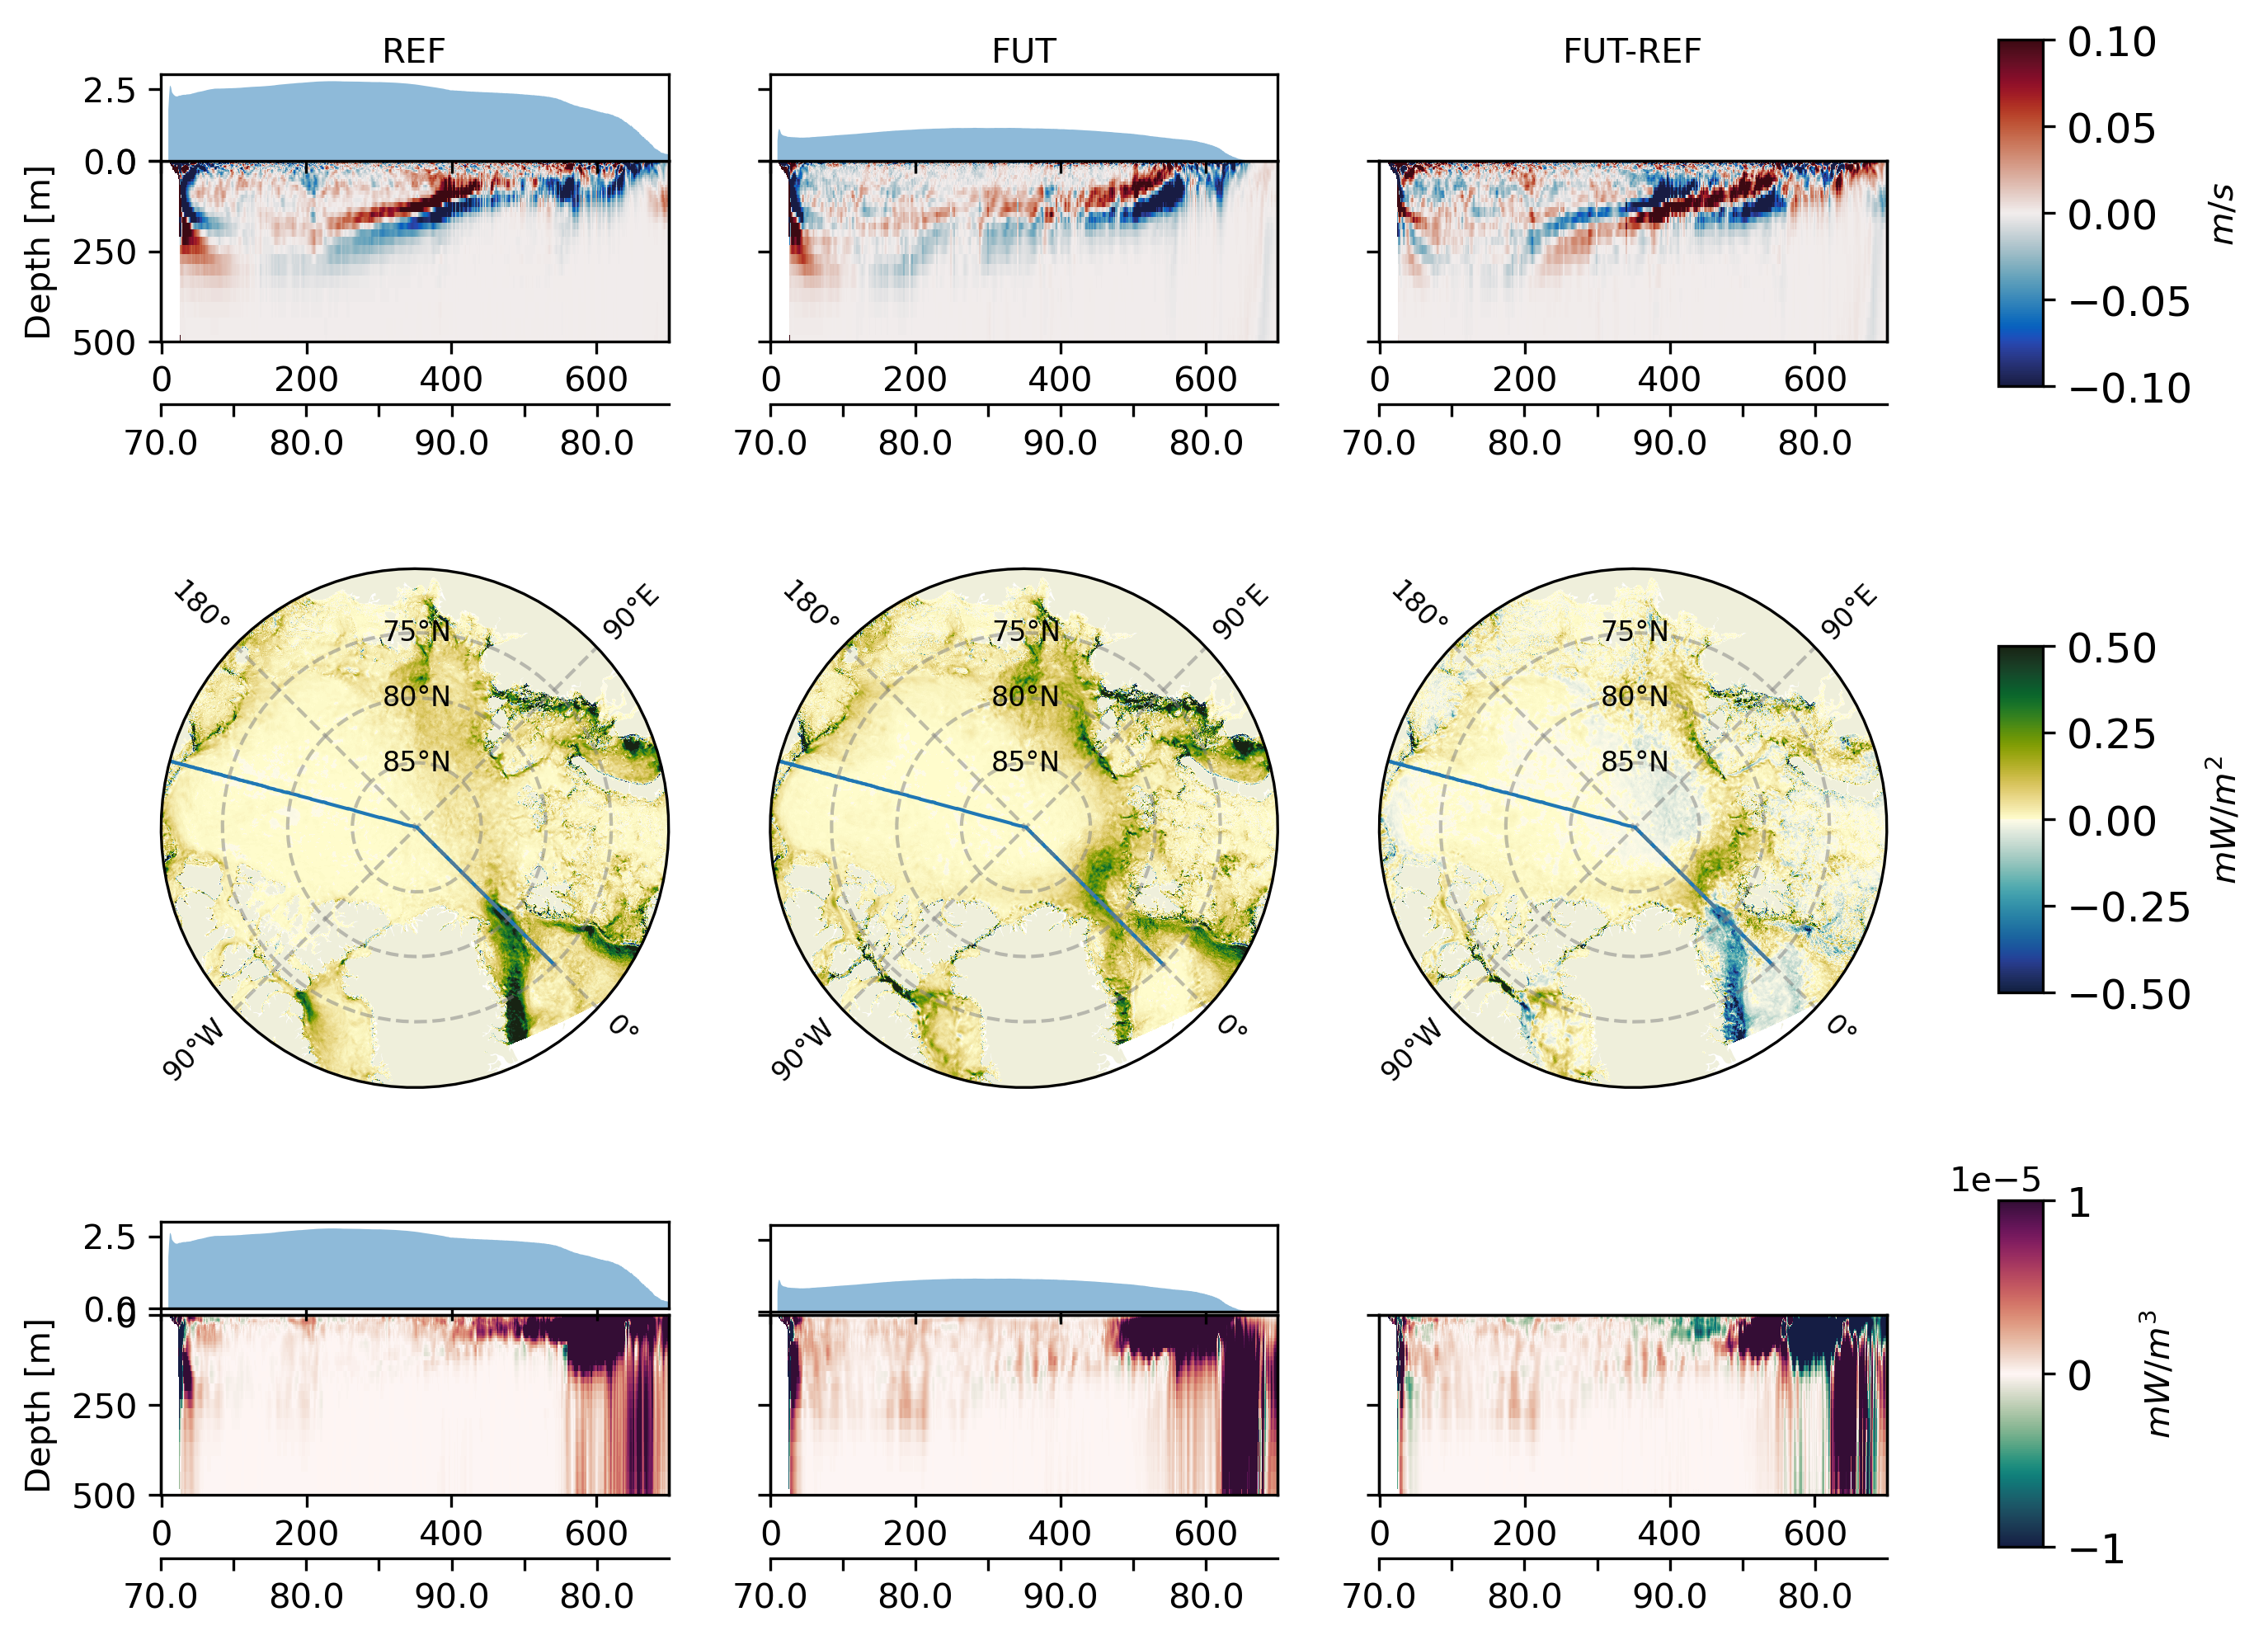

In [160]:
import matplotlib.ticker as mticker
fig = plt.figure(figsize=(9, 7),dpi=300)

gs = GridSpec(5, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax_d1 = fig.add_subplot(gs[0, 2])
################################
ax3 = fig.add_subplot(gs[1:4, 0], projection = ccrs.NorthPolarStereo(-45))
ax4 = fig.add_subplot(gs[1:4, 1], projection = ccrs.NorthPolarStereo(-45))
ax_d2 = fig.add_subplot(gs[1:4, 2], projection = ccrs.NorthPolarStereo(-45))
################################
ax5 = fig.add_subplot(gs[-1, 0])
ax6 = fig.add_subplot(gs[-1, 1])
ax_d3 = fig.add_subplot(gs[-1, 2])

################################################################################################################################

PV_cbar = data2plot_REF_PV.plot(x='diag', ax=ax1, rasterized=True, add_colorbar=False, vmin=-0.1, vmax=0.1, cmap=cmo.balance)

ax1_t = create_extra_axis(ax1,data2plot_REF_PV,-0.35)

ice_ax1 = fig.add_axes([ax1.get_position().x0,ax1.get_position().y1,ax1.get_position().width,0.05])
ice_ax1.fill_between(ice_ref.diag,ice_ref*0,ice_ref,alpha=0.5)
ice_ax1.set_xlim((0,max(ice_ref.diag)))
ice_ax1.set_ylim((0,3))
ice_ax1.xaxis.set_ticklabels([])

################################################################################################################################

PV_cbar = data2plot_FUT_PV.plot(x='diag', ax=ax2, rasterized=True, add_colorbar=False, vmin=-0.1, vmax=0.1, cmap=cmo.balance)

ax2_t = create_extra_axis(ax2,data2plot_FUT_PV,-0.35)

ice_ax2 = fig.add_axes([ax2.get_position().x0,ax2.get_position().y1,ax2.get_position().width,0.05])
ice_ax2.fill_between(ice_fut.diag,ice_fut*0,ice_fut,alpha=0.5)
ice_ax2.set_xlim((0,max(ice_fut.diag)))
ice_ax2.set_ylim((0,3))
ice_ax2.xaxis.set_ticklabels([])

################################################################################################################################

(data2plot_FUT_PV - data2plot_REF_PV).plot(x='diag', ax=ax_d1, rasterized=True, add_colorbar=False, vmin=-0.1, vmax=0.1, cmap=cmo.balance)

ax_d1_t = create_extra_axis(ax_d1,data2plot_FUT_PV,-0.35)

################################################################################################################################
################################################################################################################################
################################################################################################################################
Tbc_cbar =  T_bc_REF.__xarray_dataarray_variable__.plot(x="nav_lon", y="nav_lat", ax=ax3, 
                                            vmin=-0.5, vmax=0.5, cmap=cmo.delta, 
                                            add_colorbar=False, transform=ccrs.PlateCarree(),
                                            rasterized=True
                                           )

ax3.plot(data2plot_REF_wp_bp.nav_lon,data2plot_REF_wp_bp.nav_lat ,transform=ccrs.PlateCarree(),linewidth=1)

gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

gl.ylocator = mticker.FixedLocator([75,80,85])
gl.xlocator = mticker.FixedLocator([-90, 0,90,180])
gl.xlabel_style= {'fontsize': 8}
gl.ylabel_style= {'fontsize': 8}
################################################################################################################################
Tbc_cbar =  T_bc_FUT.__xarray_dataarray_variable__.plot(x="nav_lon", y="nav_lat", ax=ax4, 
                                            vmin=-0.5, vmax=0.5, cmap=cmo.delta, 
                                            add_colorbar=False, transform=ccrs.PlateCarree(),
                                            rasterized=True
                                           )

ax4.plot(data2plot_REF_wp_bp.nav_lon,data2plot_REF_wp_bp.nav_lat ,transform=ccrs.PlateCarree(),linewidth=1)

gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

gl.ylocator = mticker.FixedLocator([75,80,85])
gl.xlocator = mticker.FixedLocator([-90, 0,90,180])
gl.xlabel_style= {'fontsize': 8}
gl.ylabel_style= {'fontsize': 8}
################################################################################################################################
Tbc_cbar = (T_bc_FUT.__xarray_dataarray_variable__ - T_bc_REF.__xarray_dataarray_variable__ ).plot(x="nav_lon", y="nav_lat", ax=ax_d2, 
                                            vmin=-0.5, vmax=0.5, cmap=cmo.delta, 
                                            add_colorbar=False, transform=ccrs.PlateCarree(),
                                            rasterized=True
                                           )

ax_d2.plot(data2plot_REF_wp_bp.nav_lon,data2plot_REF_wp_bp.nav_lat ,transform=ccrs.PlateCarree(),linewidth=1)

gl = ax_d2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

gl.ylocator = mticker.FixedLocator([75,80,85])
gl.xlocator = mticker.FixedLocator([-90, 0,90,180])
gl.xlabel_style= {'fontsize': 8}
gl.ylabel_style= {'fontsize': 8}
################################################################################################################################
################################################################################################################################
################################################################################################################################

wp_cbar = (g * data2plot_REF_wp_bp * W2mW_conversion).plot(x='diag', ax=ax5, rasterized=True, add_colorbar=False, vmin=-1e-5, vmax=1e-5, cmap=cmo.curl)

ax5_t = create_extra_axis(ax5,data2plot_REF_wp_bp,-0.35)

ice_ax5 = fig.add_axes([ax5.get_position().x0,ax5.get_position().y1-0.025, ax5.get_position().width,0.05])
ice_ax5.fill_between(ice_ref.diag,ice_ref*0,ice_ref,alpha=0.5)
ice_ax5.set_xlim((0,max(ice_ref.diag)))
ice_ax5.set_ylim((0,3))
ice_ax5.xaxis.set_ticklabels([])

################################################################################################################################

wp_cbar = (g * data2plot_FUT_wp_bp * W2mW_conversion).plot(x='diag', ax=ax6, rasterized=True, add_colorbar=False, vmin=-1e-5, vmax=1e-5, cmap=cmo.curl)

ax6_t = create_extra_axis(ax6,data2plot_FUT_wp_bp,-0.35)

ice_ax6 = fig.add_axes([ax6.get_position().x0,ax6.get_position().y1-0.027, ax6.get_position().width,0.05])
ice_ax6.fill_between(ice_fut.diag,ice_fut*0,ice_fut,alpha=0.5)
ice_ax6.set_xlim((0,max(ice_fut.diag)))
ice_ax6.set_ylim((0,3))
ice_ax6.xaxis.set_ticklabels([])


################################################################################################################################

wp_cbar = (g * data2plot_FUT_wp_bp * W2mW_conversion - g * data2plot_REF_wp_bp * W2mW_conversion).plot(x='diag', ax=ax_d3, rasterized=True, add_colorbar=False, vmin=-1e-5, vmax=1e-5, cmap=cmo.curl)

ax_d3_t = create_extra_axis(ax_d3,data2plot_FUT_wp_bp,-0.35)

################################################################################################################################

axis = [ax2,ice_ax2,ax6,ice_ax6,ax_d1,ax_d3]

[ ax.yaxis.set_ticklabels([]) for ax in axis ] 

[ map_config(ax) for ax in [ ax3, ax4, ax_d2 ] ]

axis = [ax1,ax2,ax5,ax6,ax_d1,ax_d3]

[ ax.set_ylim((0,500)) for ax in axis ]
[ ax.invert_yaxis() for ax in axis ]
[ ax.set_xlabel('') for ax in axis ]
[ ax.set_ylabel('') for ax in axis ]

[ ax.set_ylabel('Depth [m]') for ax in [ax1,ax5] ]


ax1.text(0.5, 1.55, "REF", transform=ax1.transAxes, horizontalalignment="center")
ax2.text(0.5, 1.55, "FUT", transform=ax2.transAxes, horizontalalignment="center")
ax_d1.text(0.5, 1.55, "FUT-REF", transform=ax_d1.transAxes, horizontalalignment="center")

################################################################################################################################

fig.canvas.draw()

axis_t = [ax1_t,ax2_t,ax5_t,ax6_t,ax_d1_t,ax_d3_t]
[ latitude_labels(ax, data2plot_REF_PV) for ax in axis_t ] 

cax = plt.axes((0.95, 0.75, 0.02, 0.2))
cbar = plt.colorbar(PV_cbar, cax=cax,orientation='vertical')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"$m/s$")

cax = plt.axes((0.95, 0.4, 0.02, 0.2))
cbar = plt.colorbar(Tbc_cbar, cax=cax,orientation='vertical')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"$mW/m^2$")

cax = plt.axes((0.95, 0.08, 0.02, 0.2))
cbar = plt.colorbar(wp_cbar, cax=cax,orientation='vertical')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"$mW/m^3$")

plt.subplots_adjust(hspace=0.6)
plt.savefig('./figures/Figure_4_PV_wpbp_diff.png')